In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [13]:
# Load the features
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)

# Load the target
with open('target.pkl', 'rb') as f:
    target = pickle.load(f)

# Load the test features
with open('test_features.pkl', 'rb') as f:
    test_features = pickle.load(f)

# Load the test target
with open('test_target.pkl', 'rb') as f:
    test_target = pickle.load(f)

# Load the validation features
with open('validation_features.pkl', 'rb') as f:
    validation_features = pickle.load(f)

# Load the validation target
with open('validation_target.pkl', 'rb') as f:
    validation_target = pickle.load(f)
    
    

In [14]:
def calculate_rmse_and_predict(model, features, actual):
    predicted = model.predict(features)
    residuals = actual - predicted
    rmse = np.sqrt(np.mean(residuals**2))
    return rmse, predicted

Optimal depth: 5


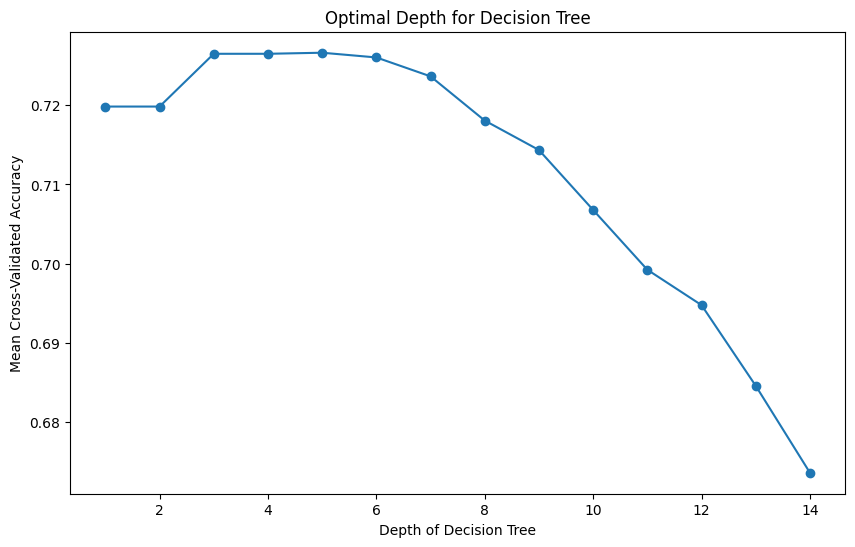

In [15]:
# Define the range of depths to test
depths = range(1, 15)

# Initialize a list to store the mean cross-validated accuracy for each depth
mean_cv_scores = []

# Loop over the depths
for depth in depths:
    # Initialize the Decision Tree Classifier with the current depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Perform cross-validation and calculate the mean accuracy
    cv_scores = cross_val_score(clf, features, target, cv=5, scoring='accuracy')
    mean_cv_scores.append(np.mean(cv_scores))

# Find the optimal depth
optimal_depth = depths[np.argmax(mean_cv_scores)]
print(f"Optimal depth: {optimal_depth}")

# Plot the mean cross-validated accuracy for each depth
plt.figure(figsize=(10, 6))
plt.plot(depths, mean_cv_scores, marker='o')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Optimal Depth for Decision Tree')
plt.show()

In [16]:
# Train the Decision Tree Classifier with the optimal depth
clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
clf.fit(features, target)

# Predict on the test data
test_predictions = clf.predict(test_features)

# Calculate the accuracy
test_accuracy = accuracy_score(test_target, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7282355052952791


In [17]:
# Calculate RMSE and predictions for test data
rmse_test, test_predictions = calculate_rmse_and_predict(clf, test_features, test_target)
print(f"RMSE on test data: {rmse_test}")

# Calculate RMSE and predictions for validation data
rmse_validation, validation_predictions = calculate_rmse_and_predict(clf, validation_features, validation_target)
print(f"RMSE on validation data: {rmse_validation}")


RMSE on test data: 0.5213103631280707
RMSE on validation data: 0.5225765422252234


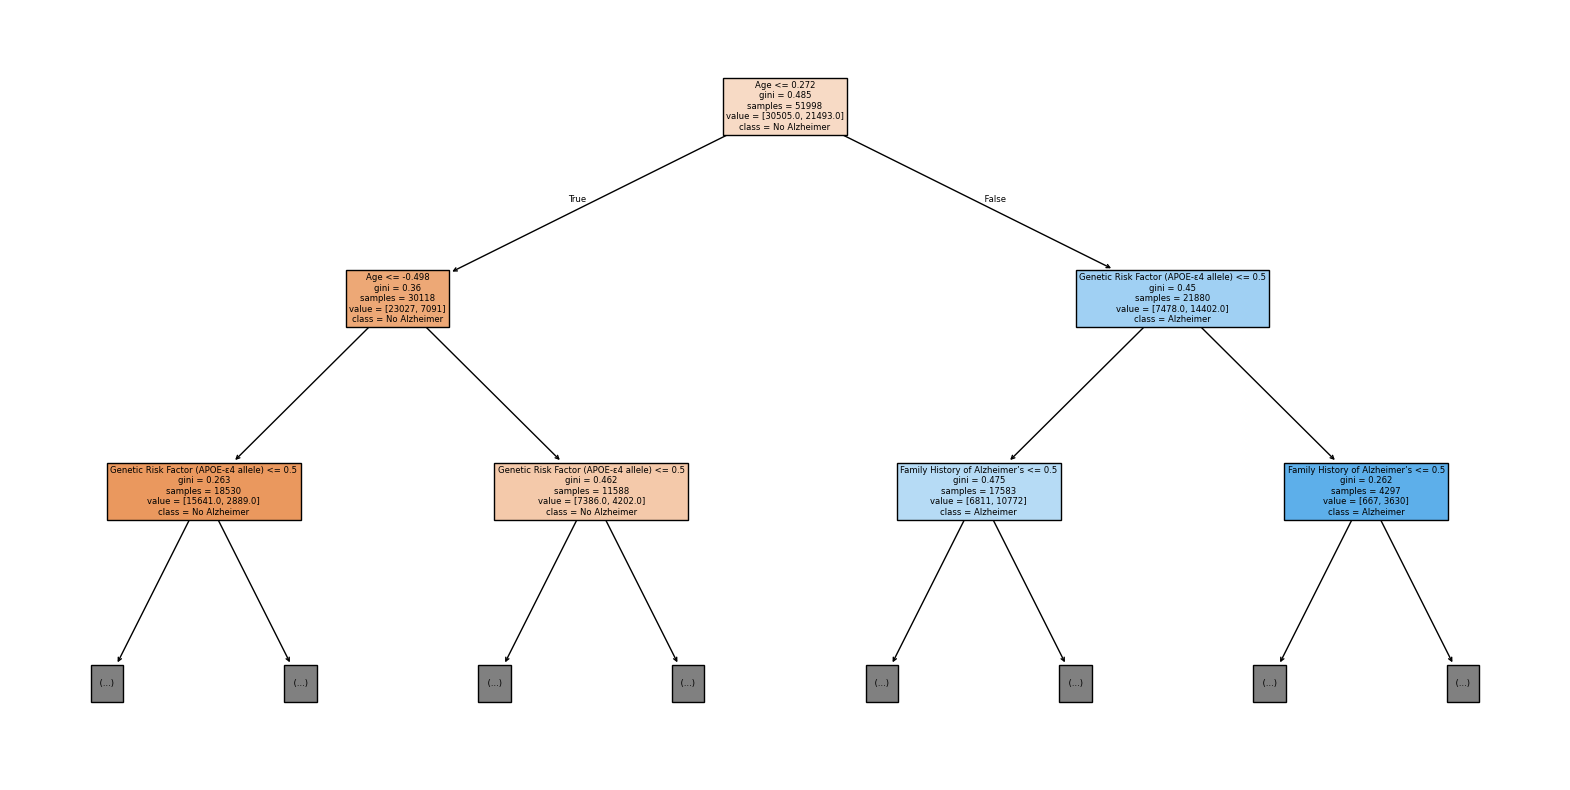

In [18]:
# Plot the decision tree with a depth of 2 levels for better visualization
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features.columns, class_names=['No Alzheimer', 'Alzheimer'], filled=True, max_depth=2)
plt.show()

In [19]:
# Load existing model results
with open('model_results.pkl', 'rb') as f:
    model_results = pickle.load(f)

# Update the model results with new data
model_results['Decision Trees (Optimal k)'] = {
    'Accuracy': test_accuracy,
    'RMSE (test set)': rmse_test,
    'RMSE (Val set)': rmse_validation
}

# Save updated model results
with open('model_results.pkl', 'wb') as f:
    pickle.dump(model_results, f)
